<a href="https://colab.research.google.com/github/Karanuderani07/ML_LEARNING/blob/main/Exp_11_PCA_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
iris.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  iris.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Iris.csv                
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         


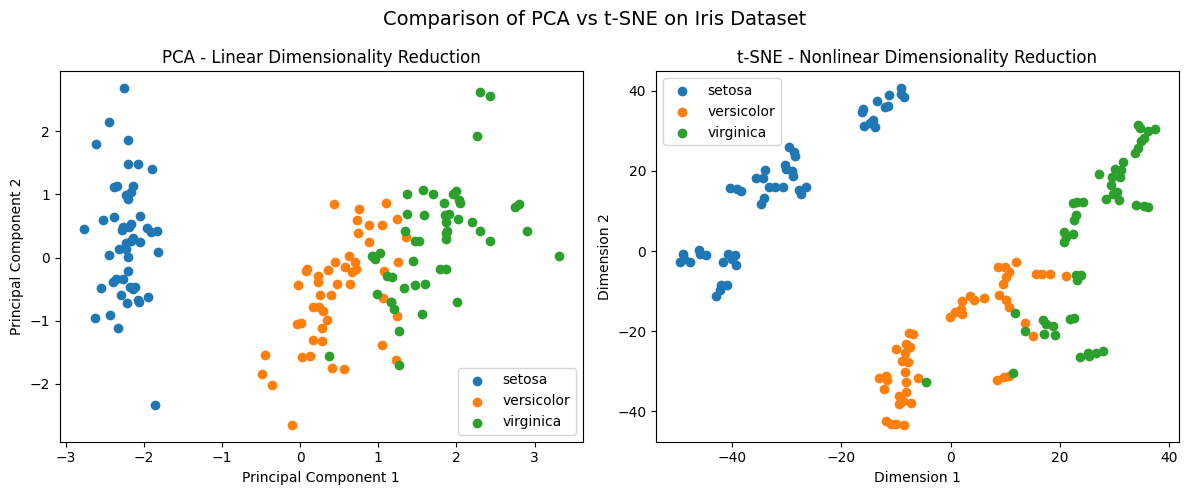

In [2]:
!pip install kaggle --quiet
!mkdir -p ~/.kaggle
!echo '{"username":"karanuderani","key":"5fc4a285fc0912cd162a06efd99cfa14"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/iris
!unzip iris.zip
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Separate features and labels
X = df.iloc[:, :-1]
y = df['species']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, label in enumerate(label_encoder.classes_):
    axes[0].scatter(X_pca[y_encoded == i, 0], X_pca[y_encoded == i, 1], label=iris.target_names[i])
axes[0].set_title("PCA - Linear Dimensionality Reduction")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].legend()

for i, label in enumerate(label_encoder.classes_):
    axes[1].scatter(X_tsne[y_encoded == i, 0], X_tsne[y_encoded == i, 1], label=iris.target_names[i])
axes[1].set_title("t-SNE - Nonlinear Dimensionality Reduction")
axes[1].set_xlabel("Dimension 1")
axes[1].set_ylabel("Dimension 2")
axes[1].legend()

plt.suptitle("Comparison of PCA vs t-SNE on Iris Dataset", fontsize=14)
plt.tight_layout()
plt.show()